<a href="https://colab.research.google.com/github/nahlatafi/skinnea/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries for manage the file in os and in the gdrive
from google.colab import drive
import os

# Read the image
import glob as gb

# Libraries for do visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for do computational things
import numpy as np
import pandas as pd
import datetime

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

# Libraries for Deep learning tasks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
# from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

In [ ]:
# Make sure gdrive is connected
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Display a list of directories
!ls "/content/gdrive/MyDrive/new-skinnea-dataset"

test  train


In [ ]:
# Initialization
BASE_DIR = '/content/gdrive/MyDrive/new-skinnea-dataset'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VAL_DIR = os.path.join(BASE_DIR, 'val')
TEST_DIR = os.path.join(BASE_DIR, 'test')

In [ ]:
# Counting the amount of data

# from glob import glob
# train_dermatitis_dir = glob(TRAIN_DIR+'/Dermatitis/*.jpg')
# train_poison_dir = glob(TRAIN_DIR+'/Poison/*.jpg')
# train_scabies_dir = glob(TRAIN_DIR+'/Scabies/*.jpg')

In [ ]:
# Ini len nya ga ke detect, help me!

# print(f'Banyaknya data Dermatitis : {len(train_dermatitis_dir)}')
# print(f'Banyaknya data Poison : {len(train_poison_dir)}')
# print(f'Banyaknya data Scabies : {len(train_scabies_dir)}')

Banyaknya data Dermatitis : 0
Banyaknya data Poison : 0
Banyaknya data Scabies : 0


In [ ]:
# Calculating training data
print('Training Data Directory: ')
print(TRAIN_DIR)
print('-'*55)
for folder in os.listdir(TRAIN_DIR):
  files=gb.glob(pathname=str(TRAIN_DIR + '/' + folder + '/*.jpg'))
  print(f'{len(files):4} images found in the {folder} folder.')

Training Data Directory: 
/content/gdrive/MyDrive/skinnea-dataset/train
-------------------------------------------------------
 489 images found in the Atopic Dermatitis folder.
 260 images found in the Poison Ivy folder.
 392 images found in the Scabies Lyme folder.


In [ ]:
# Calculating validation data
print('Validation Data Directory: ')
print(VAL_DIR)
print('-'*55)
for folder in os.listdir(VAL_DIR):
  files=gb.glob(pathname=str(VAL_DIR + '/' + folder + '/*.jpg'))
  print(f'{len(files):4} images found in the {folder} folder.')

In [ ]:
# Calculating testing data
print('Testing Data Directory: ')
print(TEST_DIR)
print('-'*55)
for folder in os.listdir(TEST_DIR):
  files=gb.glob(pathname=str(TEST_DIR + '/' + folder + '/*.jpg'))
  print(f'{len(files):4} images found in the {folder} folder.')

Testing Data Directory: 
/content/gdrive/MyDrive/skinnea-dataset/test
-------------------------------------------------------
 104 images found in the Scabies Lyme folder.
  65 images found in the Poison Ivy folder.
 123 images found in the Atopic Dermatitis folder.


In [ ]:
# def count_files(dir):
#     arr = []
#     for root, dirs, files in os.walk(dir):
#         count = 0
#         for name in files:
#             if name.endswith(".jpg"):
#               count = count + 1
#         if count > 0:
#           arr.append(count)
#     return arr

# def get_all_labels_names(dir):
#   arr = []
#   for root, dirs, files in os.walk(dir):
#     arr.append(dirs)
#     break
#   return arr

3
[['Atopic Dermatitis', 'Poison Ivy', 'Scabies Lyme']]


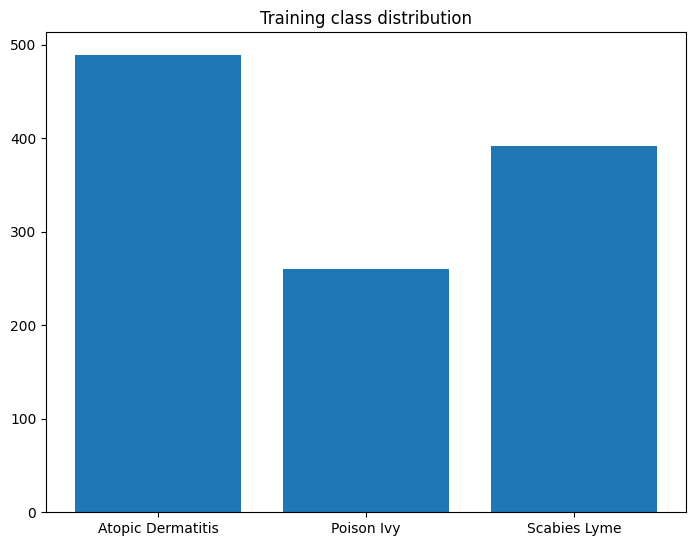

In [ ]:
# image_count = count_files(TRAIN_DIR)
# print(len(image_count))
# chars = get_all_labels_names(TRAIN_DIR)
# print(chars)

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(chars[0], image_count)
# plt.title("Training class distribution")
# plt.show()

3
[['Scabies Lyme', 'Poison Ivy', 'Atopic Dermatitis']]


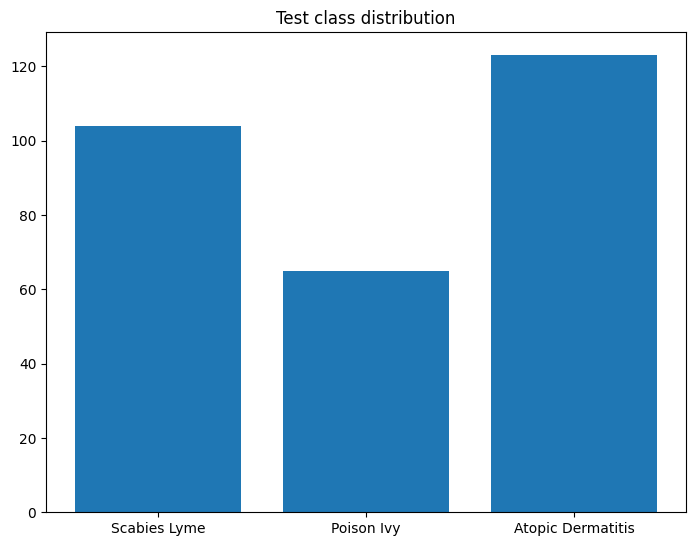

In [ ]:
# image_count = count_files(TEST_DIR)
# print(len(image_count))
# chars = get_all_labels_names(TEST_DIR)
# print(chars)

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(chars[0], image_count)
# plt.title("Test class distribution")
# plt.show()

In [ ]:
def show_images(img_files):
  plt.figure()
  fig = plt.figure(figsize=(10, 10))
  fig.patch.set_facecolor('xkcd:gray')

  for i in range(len(img_files)):
        plt.subplot(5,5,i+1)  
        img=mpimg.imread(img_files[i])
        plt.imshow(img)
        plt.tight_layout()
        plt.axis('off')
        plt.title(img_files[i].split("/")[7]) 
    
  plt.show()


def list_files(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            if name.endswith('.jpg'):
              arr.append(os.path.join(root, name))
              break
    return arr

['/content/gdrive/MyDrive/skinnea-dataset/train/Atopic Dermatitis/Atopic Dermatitis(176).jpg', '/content/gdrive/MyDrive/skinnea-dataset/train/Poison Ivy/Poison Ivy (89).jpg', '/content/gdrive/MyDrive/skinnea-dataset/train/Scabies Lyme/Scabies Lyme (1).jpg']


<Figure size 640x480 with 0 Axes>

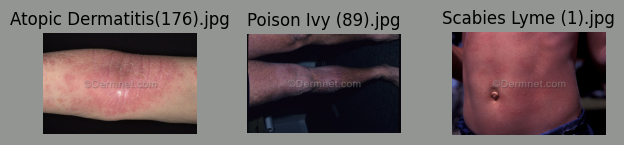

In [ ]:
image_list = list_files(TRAIN_DIR)
show_images(image_list)

In [ ]:
# Image Segmentation



In [1]:
# Image Augmentation

# Datagen for validation set dan training set
datagen = ImageDataGenerator(
                             rescale = 1./255,
                             rotation_range = 45,
                             zoom_range = 0.1,
                             width_shift_range=0.15, 
                             shear_range= 0.1,
                             height_shift_range=0.15,
                             horizontal_flip=True,
                             vertical_flip= True,
                             fill_mode='nearest',
                             )

# ImageDataGenerator for test set
val_test_datagen = ImageDataGenerator(rescale=1./255)

NameError: ignored

In [ ]:
# Let's try with 224, 224
IMG_SIZE = (224, 224)

# Create train dataset
train_set = datagen.flow_from_directory(TRAIN_DIR, 
                                        class_mode='categorical', 
                                        batch_size= 64,
                                        target_size=IMG_SIZE,
                                        seed=42)

Found 1141 images belonging to 3 classes.


In [ ]:
os.listdir(TRAIN_DIR)

In [ ]:
os.listdir(VAL_DIR)

In [ ]:
os.listdir(TEST_DIR)

In [ ]:
# Create validation dataset
val_set= val_test_datagen.flow_from_directory(VAL_DIR, 
                                       class_mode='categorical',
                                       batch_size= 64,
                                       target_size=IMG_SIZE
                                       )

Found 145 images belonging to 3 classes.


In [ ]:
# Create test dataset
test_set = val_test_datagen.flow_from_directory(TEST_DIR, 
                                       class_mode='categorical',
                                       batch_size= 64,
                                       target_size=IMG_SIZE
                                       )

Found 147 images belonging to 3 classes.


In [ ]:
train_set.class_indices

In [ ]:
val_set.class_indices

In [ ]:
test_set.class_indices

In [ ]:
# Create variabel X_train and y_train
X_train, y_train = train_set.next()

# Create variabel X_test and y_test
X_test, y_test = test_set.next()

# Create variabel X_val and y_val
X_val, y_val = val_set.next()

In [ ]:
# Print train shape and test shape

# print('Train X=%s Y=%s' %(X_train.shape, y_train.shape))
# print('Test X=%s Y=%s' %(X_test.shape, y_test.shape))

Train X=(64, 224, 224, 3) Y=(64, 3)
Test X=(64, 224, 224, 3) Y=(64, 3)


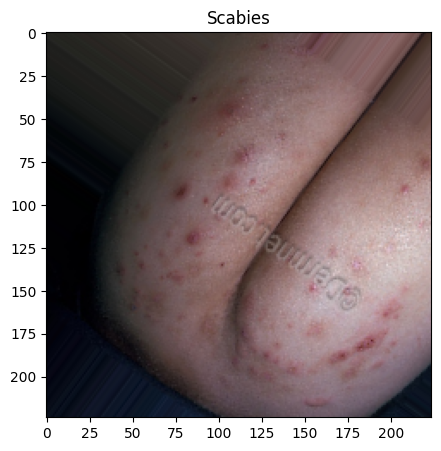

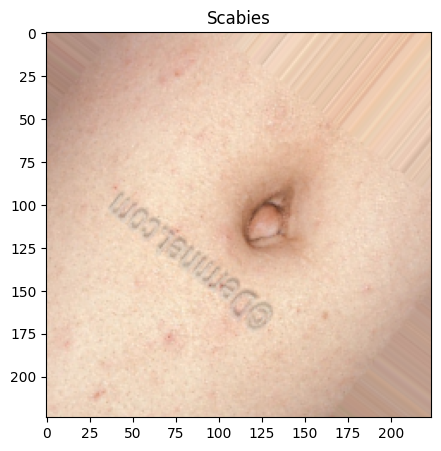

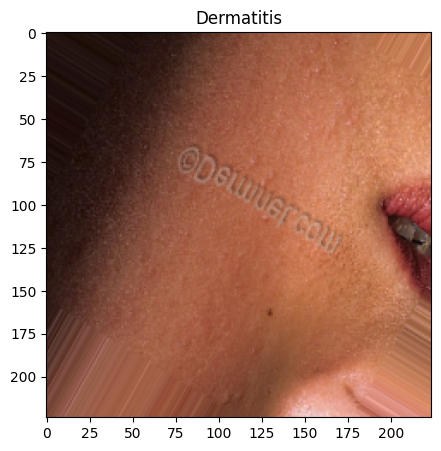

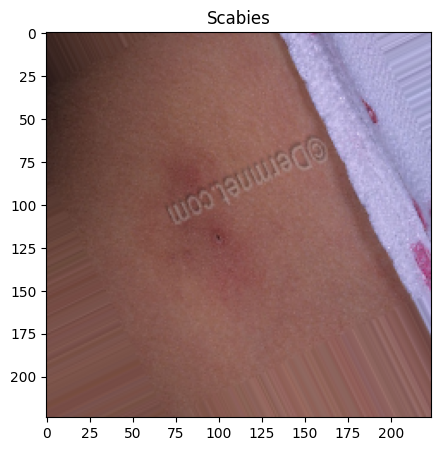

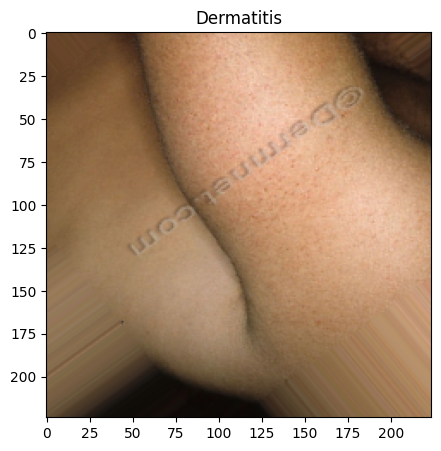

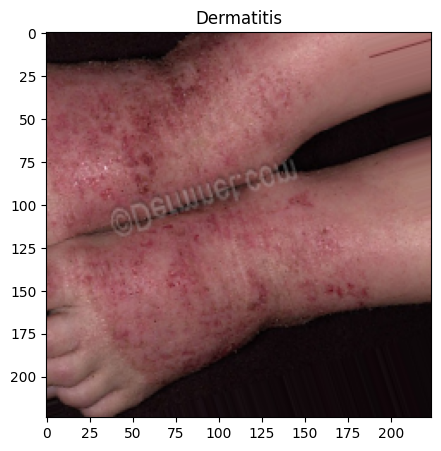

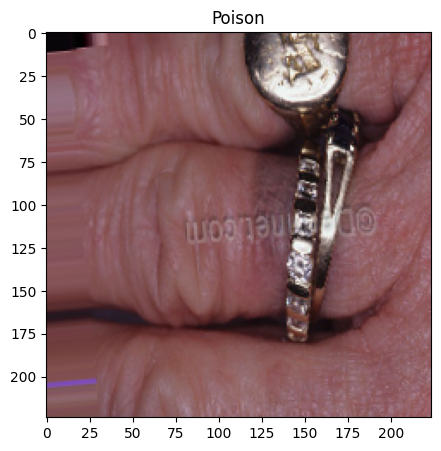

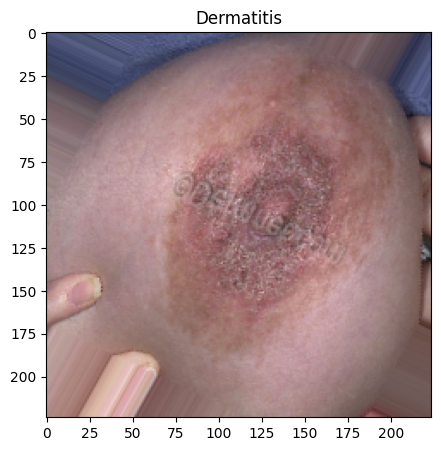

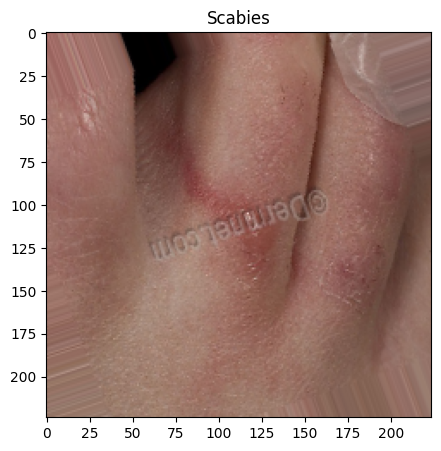

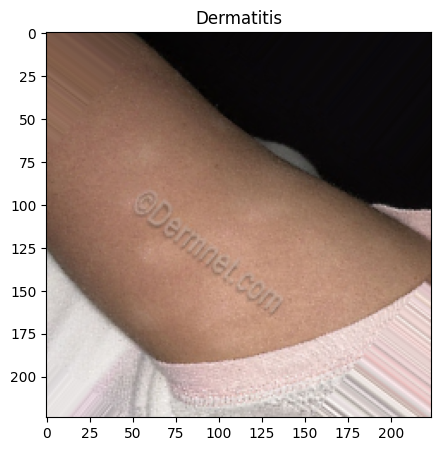

In [ ]:
# Idk, gambarnya ada wm nya
class_dict = {v : k for k, v in train_set.class_indices.items()}

def plot_augmented_imgs(X, y):
  labels=[]
  y_label = np.argmax(y, axis=1)
  
  for label in y_label:
    labels.append(class_dict[label])

  for idx in range(0,10):
      plt.figure(figsize=(5, 5))
      plt.imshow(X_train[idx])
      plt.title(labels[idx])

In [ ]:
plot_augmented_imgs(X_val, y_val)

In [ ]:
# Build the model

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', min_lr=1e-8)
checkpoint_cb = ModelCheckpoint("current_best_model.h5", saved_best_only=True)
early_stop_cb = EarlyStopping(patience=10,monitor='val_loss', restore_best_weights= True)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, 
                                                   histogram_freq=1)
# Clear any logs from previous runs
!rm -rf ./logs/ 

callbacks =[reduce_lr, checkpoint_cb, early_stop_cb, tensorboard_callback]

In [ ]:
# # Define Callbacks
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.callbacks import Callback, LearningRateScheduler
# from tensorflow.keras.callbacks import TensorBoard
# import datetime

# ## Callbacks when accuracy got 93% or above, the model will stop early
# class CustomCallback(Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('accuracy') >= 0.93 and logs.get('val_accuracy') >= 0.93) and (logs.get('loss')<= 0.3 and logs.get('val_loss') <= 0.3):
#             if logs.get('accuracy') <= logs.get('val_accuracy'):
#                 self.model.stop_training = True
#             else:
#                 self.model.stop_training = False

# ## This function is for adjust the learning rate using exponential_decay
# def exponential_decay(lr0, s):
#   def exponential_decay_fn(epoch):
#     return lr0 * 0.1 **(epoch/s)
#   return exponential_decay_fn

# exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

# lr_scheduler = LearningRateScheduler(exponential_decay_fn)
# custom_cb = CustomCallback()

# # Define checkp point
# checkpoint_cb = ModelCheckpoint("current_best_model.h5", saved_best_only=True)
# early_stop_cb = EarlyStopping(patience=10, restore_best_weights= True)

# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=log_dir, 
#                                                    histogram_freq=1)
# # Clear any logs from previous runs
# !rm -rf ./logs/ 

# callbacks = [custom_cb, checkpoint_cb, early_stop_cb, lr_scheduler, tensorboard_callback]


In [ ]:
def evaluate_model(model, X, y):
  print('Loss of the model is - ', model.evaluate(X, y)[0])
  print('Accuracy of the model is - ', model.evaluate(X, y)[1]*100, '%')
  predict = model.predict(X)
  # print(predict)
  predict = np.argmax(predict, axis=1)
  predict = predict.reshape(1, -1)[0]
  y_label = np.argmax(y, axis=1)
  print(classification_report(y_label, predict, target_names =['Chickenpox', 'Melanoma', 'Scabies']))

  conf_matrix = confusion_matrix(y_label, predict)
  # print(conf_matrix)
  df_cm = pd.DataFrame(conf_matrix, index = [i for i in ('Chickenpox', 'Melanoma', 'Scabies')],
                  columns = [i for i in ('Chickenpox', 'Melanoma', 'Scabies')])
  plt.figure(figsize = (3, 3))
  sns.heatmap(df_cm, annot=True)

plt.style.use('seaborn-whitegrid')

def plot_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.subplot(1, 2, 1)
  acc_plot, = plt.plot(epochs, acc, 'orange')
  val_acc_plot, = plt.plot(epochs, val_acc, 'blue')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.subplot(1, 2, 2)
  loss_plot, = plt.plot(epochs, loss, 'orange')
  val_loss_plot, = plt.plot(epochs, val_loss, 'blue')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def plot_hist(history):
  plt.figure(figsize=(15,5))
  plot_acc(history)

In [ ]:
# Define xception based Model using 224, 224 input image and pooling max
xception_based_model = Xception(weights='imagenet', input_shape=(224, 224 ,3), include_top=False, pooling='max')
x = xception_based_model.output

# Define the MLP for classification
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
predictions = Dense(10, activation='softmax')(x)

# Define the model
model = Model(inputs=xception_based_model.input, outputs = predictions)

# freeze all layer in xception_based_model for training process,
for layer in xception_based_model.layers:
  layer.trainable = False
optimizer=Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [2]:
hist = model.fit(train_set, epochs=10, validation_data = val_set, verbose = 1, callbacks=callbacks,
          )

NameError: ignored

In [ ]:
plot_hist(hist)

In [ ]:
# Evaluate the current model

print('Loss of the model is - ', model.evaluate(X_test, y_test)[0])
print('Accuracy of the model is - ', model.evaluate(X_test, y_test)[1]*100, '%')

predict = model.predict(X_test)
# print(predict)
predict = np.argmax(predict, axis=1)
predict = predict.reshape(1, -1)[0]

curr_y_test = np.argmax(y_test, axis=1)


from sklearn.metrics import classification_report
print(classification_report(curr_y_test, predict, target_names =['Dermatitis', 'Poison', 'Scabies']))

ValueError: ignored